

# Ads CTR Forecasting: A Beginner's Guide using Python

Welcome to the world of Ads Click-Through Rate (CTR) Analysis and Forecasting! If you're embarking on your first project and diving into the realm of understanding the effectiveness of online advertisements, you're in the right place. In this guide, we'll walk through the process of Ads CTR Analysis and Forecasting using Python.

## What is Ads CTR Analysis?

Ads CTR Analysis involves evaluating the performance of online advertisements by measuring the rate at which users click on an ad's link to visit the advertiser's website. This analysis is essential for businesses to assess the return on investment (ROI) of their advertising efforts and make informed decisions to enhance ad performance.

## Steps for Ads CTR Analysis and Forecasting:

1. **Gather Ad Data:**
   Collect relevant ad data, including the number of ad impressions (how often an ad was shown), the number of clicks, and any other metrics that might be pertinent.

2. **Explore the Data:**
   Understand the characteristics and distribution of the data. Calculate basic statistics like the mean CTR (Click-Through Rate) and standard deviation.

3. **Visualize CTR Trends:**
   Create visualizations such as line charts or bar graphs to represent CTR trends over time. Visualization is key to gaining insights into the data.

4. **A/B Testing:**
   Conduct A/B tests if necessary to compare the performance of different ad variations. This helps in identifying what works best for your target audience.

5. **Identify Influencing Factors:**
   Analyze the CTR data to pinpoint factors that influence ad performance. Understanding these factors is crucial for making targeted improvements.

6. **Build Forecasting Model:**
   Develop a forecasting model using Python to predict future CTR values. This step is instrumental in anticipating ad performance and optimizing advertising strategies.

## Getting Started:

To kickstart your Ads CTR Forecasting project, we've identified an ideal dataset for your analysis. You can download the dataset [here](https://drive.google.com/file/d/1oQyJPFp23Xl5HH9LEjc2sBbxHEDtyK90/view?usp=sharing).

Now, let's dive into Python and start our journey towards Ads CTR Analysis and Forecasting.

Happy coding!

Import the necessary Python libraries and load the dataset to begin exploring and understanding the world of advertising analytics.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/all dataset/ctr.csv")


In [2]:
df

,Date,Clicks,Impressions
0,2022-10-19,2851,58598
1,2022-10-20,2707,57628
2,2022-10-21,2246,50135
3,2022-10-22,1686,40608
4,2022-10-23,1808,41999
...,...,...,...
360,2023-10-14,885,28487
361,2023-10-15,1180,33440
362,2023-10-16,1624,41688
363,2023-10-17,1751,40957


Convert DataFrame's Date column to datetime format, set as index.

In [3]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d')
df.set_index('Date', inplace=True)

Visualize time trends for clicks and impressions in the dataset.

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Clicks'], mode='lines', name='Clicks Over time'))
fig.add_trace(go.Scatter(x=df.index, y=df['Impressions'], mode='lines', name='Impressions Over time'))
fig.update_layout(title='Clicks and Impressions Over Time')
fig.show()

In [5]:
import plotly.express as px
import plotly.express as px

fig = px.scatter(df, x="Clicks", y="Impressions").update_layout(title=dict(text="RelationShip between Clicks and Impressions", x=0.5, font=dict(color="red", size=30)))
fig.show()


The relationship between Impressions and clicks is positive correlation

Now Let's Calculate and visualize time-based CTR to understand its trends over time.

In [6]:
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100
fig = px.line(df, x=df.index, y='CTR').update_layout(title=dict(text='Click-Through Rate (CTR) Over Time', x=0.5, font=dict(size=30)))
fig.show()

In [12]:
df['Day of week'] = df.index.dayofweek
average_ctr_by_day = df.groupby(['Day of week'])['CTR'].mean().reset_index()
average_ctr_by_day['Day of week'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig = px.bar(average_ctr_by_day, x='Day of week', y='CTR', title='Average Click-Through Rate (CTR) by Day of Week')
fig.update_layout(title=dict(text='Average Click-Through Rate (CTR) by Day of Week', x=0.5, font=dict(size=30)))
fig.show()

# Ads CTR Forecasting

In the realm of Ads Click-Through Rate (CTR) forecasting, understanding and predicting CTR becomes crucial as it evolves with impressions over time. To achieve this, Time Series forecasting techniques come into play. Given the seasonal nature of CTR, we'll delve into calculating the p, d, and q values for the Seasonal Autoregressive Integrated Moving Average (SARIMA) model:



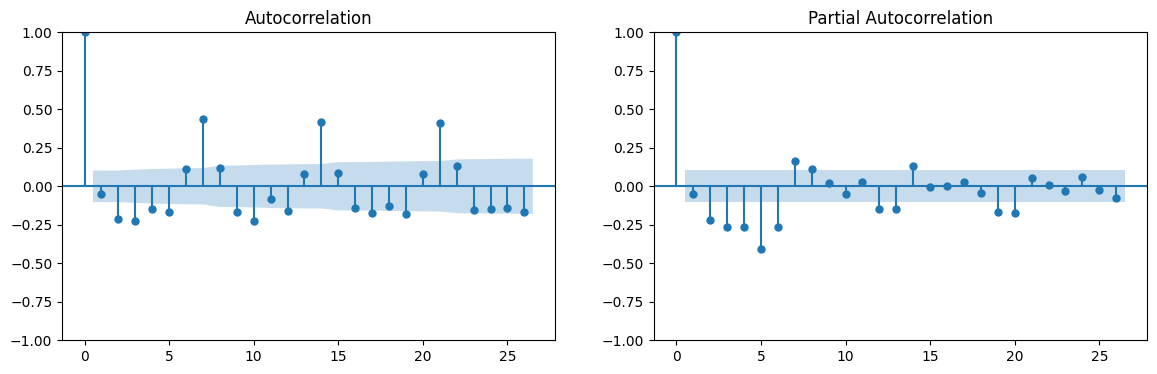

In [14]:
df.reset_index(inplace=True)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# resetting index
time_series = df.set_index('Date')['CTR']

# Differencing
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

# Training the SARIMA Forecasting Model

Let's embark on the journey of training our forecasting model using the Seasonal Autoregressive Integrated Moving Average (SARIMA) algorithm. This model is tailored to capture the seasonal patterns inherent in Ads Click-Through Rate (CTR) data, providing us with the tools to make insightful predictions.

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q, s = 1, 1, 1, 12

model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                     SARIMAX Results                                      
Dep. Variable:                                CTR   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -71.365
Date:                            Sat, 30 Dec 2023   AIC                            152.730
Time:                                    06:24:28   BIC                            172.048
Sample:                                10-19-2022   HQIC                           160.418
                                     - 10-18-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5266      0.070      7.513      0.000       0.389       0.664
ma.L1         -0.9049      0.036   

# Predicting Future CTR Values

Now, let's unravel the process of predicting future Click-Through Rate (CTR) values. By applying our trained Seasonal Autoregressive Integrated Moving Average (SARIMA) model, we can gain foresight into the upcoming trends in CTR, allowing us to make informed decisions based on our forecasting insights.

In [17]:
future_steps = 100
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
print(predictions)

2023-10-19    3.852350
2023-10-20    3.889426
2023-10-21    3.820260
2023-10-22    3.727494
2023-10-23    3.710360
                ...   
2024-01-22    3.545574
2024-01-23    3.466648
2024-01-24    3.561193
2024-01-25    3.546697
2024-01-26    3.580132
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


Now, let’s visualize the forecasted trend of CTR:

In [20]:
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))
fig.update_layout(title='CTR Forecasting',
                   xaxis_title='Time Period',
                   yaxis_title='Impressions',
                   legend=dict(x=0.1, y=0.9),
                   showlegend=True)
fig.show()


#                                THE END